# Face Recognition Dataset Image Classification
## By [Johann Pineda | Add me on Linkedin | Open for work](https://www.linkedin.com/in/johannpineda/)
### Celeb Face Recognition Dataset
# About Dataset
This is a Face Dataset of different Celebrities after applying MTCNN for face detection. Contains 49 images per celeb with labels.
The labels that are included are as follows:
    
Akshay Kumar
Alexandra Daddario
Alia Bhatt
Amitabh Bachchan
Andy Samberg
Anushka Sharma
Billie Eilish
Brad Pitt
Camila Cabello
Charlize Theron
Claire Holt
Courtney Cox
Dwayne Johnson
Elizabeth Olsen
Ellen Degeneres
Henry Cavill
Hrithik Roshan
Hugh Jackman
Jessica Alba
Kashyap
Lisa Kudrow
Margot Robbie
Marmik
Natalie Portman
Priyanka Chopra
Robert Downey Jr
Roger Federer
Tom Cruise
Vijay Deverakonda
Virat Kohli
Zac Efron
# Code

In [1]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras import models, layers, optimizers

# Set the path to the dataset folder
dataset_path = '/kaggle/input/face-recognition-dataset/Dataset/Faces'

# Set the batch size and image size
batch_size = 32
image_size = (224, 224)

# Create an instance of the ImageDataGenerator class for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Create a generator for the training data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

# Load the VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding custom layers on top of the base model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(31, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

2024-02-15 14:18:54.140225: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 14:18:54.140317: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 14:18:54.304403: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 1483 images belonging to 31 classes.
58889256/58889256 [==============================] - 1s 0us/step


In [2]:
# Train the model
history = model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=200)

/tmp/ipykernel_26/2636954020.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=200)


Epoch 1/200


I0000 00:00:1708006761.118681      80 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


46/46 [==============================] - 42s 663ms/step - loss: 5.1625 - acc: 0.0662
Epoch 2/200
46/46 [==============================] - 20s 423ms/step - loss: 3.2472 - acc: 0.1006
Epoch 3/200
46/46 [==============================] - 19s 418ms/step - loss: 2.9565 - acc: 0.1668
Epoch 4/200
46/46 [==============================] - 19s 414ms/step - loss: 2.7128 - acc: 0.2267
Epoch 5/200
46/46 [==============================] - 20s 424ms/step - loss: 2.4801 - acc: 0.2633
Epoch 6/200
46/46 [==============================] - 20s 435ms/step - loss: 2.3402 - acc: 0.2936
Epoch 7/200
46/46 [==============================] - 20s 425ms/step - loss: 2.1453 - acc: 0.3660
Epoch 8/200
46/46 [==============================] - 19s 417ms/step - loss: 2.0809 - acc: 0.3584
Epoch 9/200
46/46 [==============================] - 19s 418ms/step - loss: 1.9492 - acc: 0.4128
Epoch 10/200
46/46 [==============================] - 20s 429ms/step - loss: 1.8513 - acc: 0.4252
Epoch 11/200
46/46 [=====================

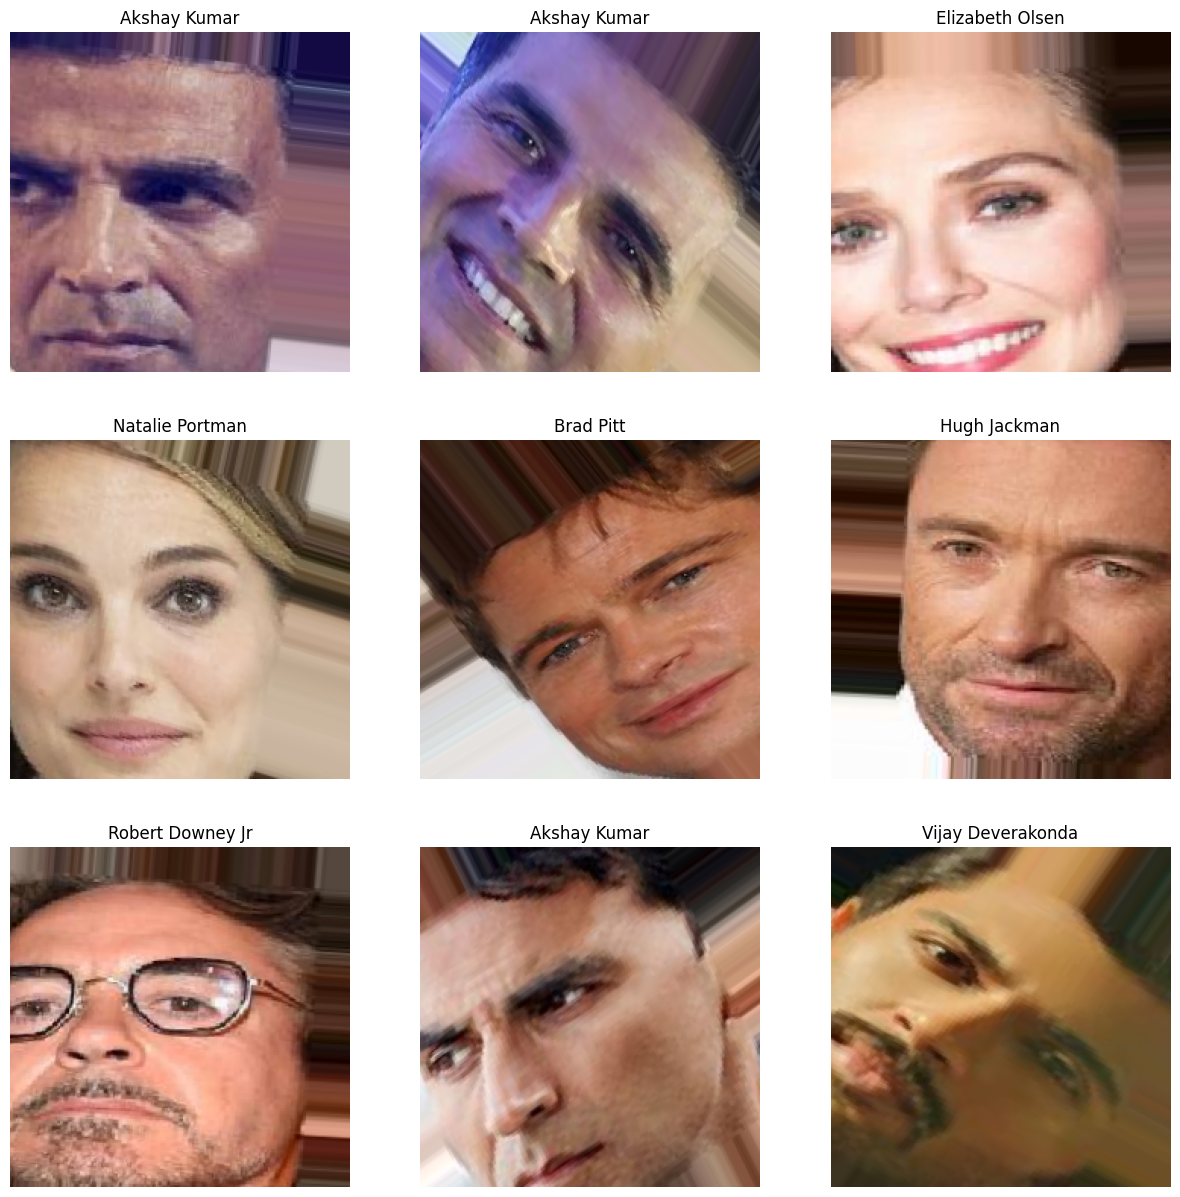

In [3]:
import matplotlib.pyplot as plt

# Get the class labels
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())

# Display the images and their labels
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i in range(9):
    x, y = train_generator.next()
    image = x[0]
    label = y[0]
    label = np.argmax(label)
    label = class_labels[label]
    ax[i//3, i%3].imshow(image)
    ax[i//3, i%3].set_title(label)
    ax[i//3, i%3].axis('off')
plt.show()

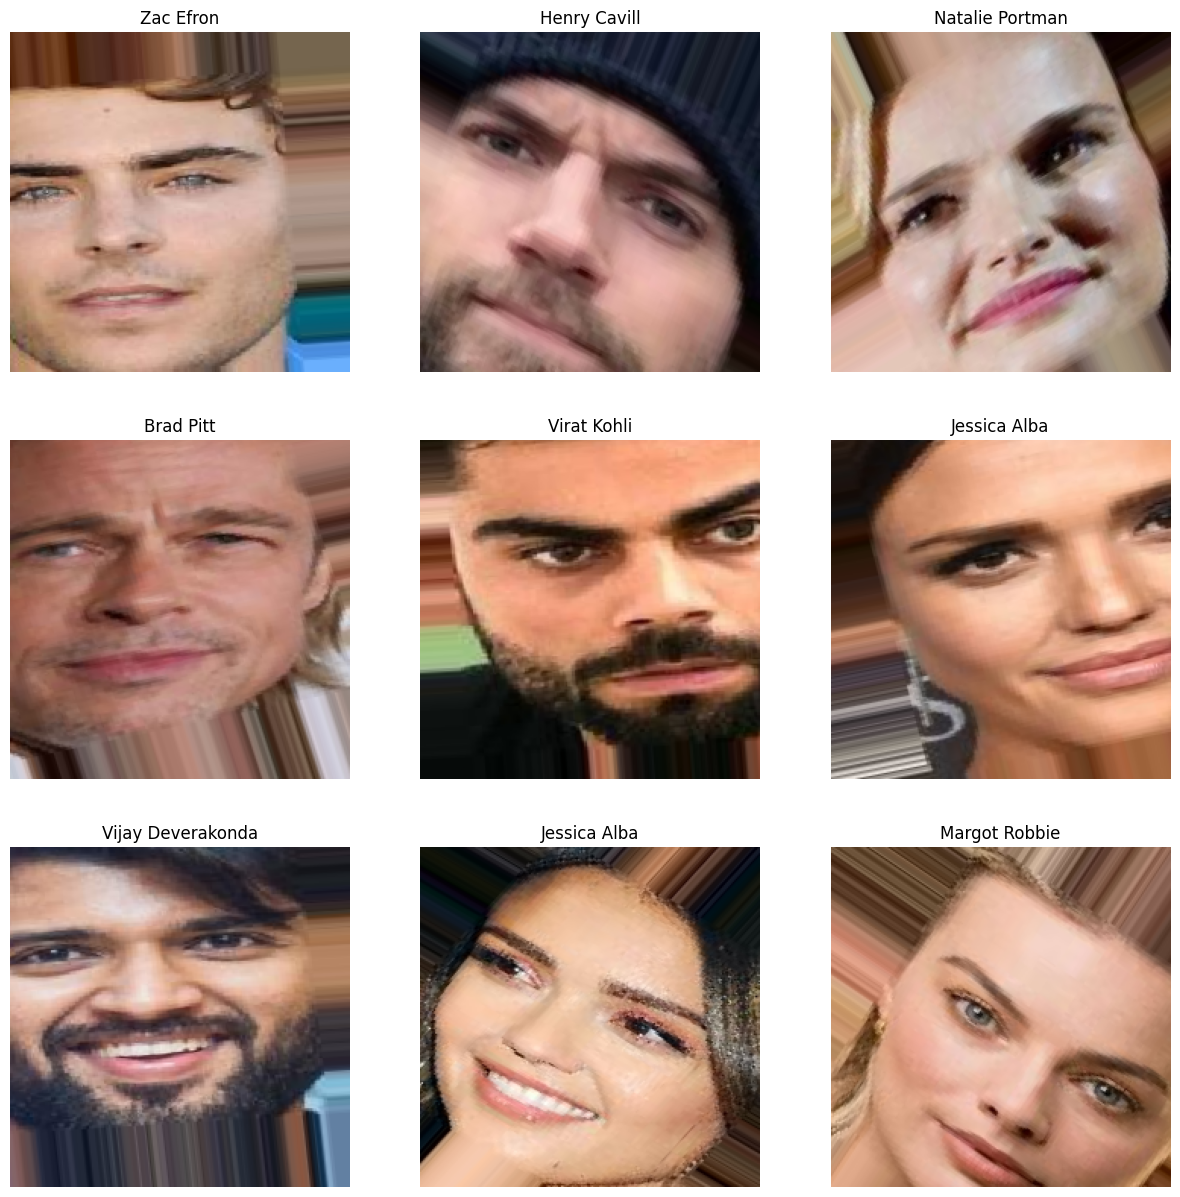

In [4]:
import matplotlib.pyplot as plt

# Get the class labels
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())

# Display the images and their labels
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i in range(9):
    x, y = train_generator.next()
    image = x[0]
    label = y[0]
    label = np.argmax(label)
    label = class_labels[label]
    ax[i//3, i%3].imshow(image)
    ax[i//3, i%3].set_title(label)
    ax[i//3, i%3].axis('off')
plt.show()

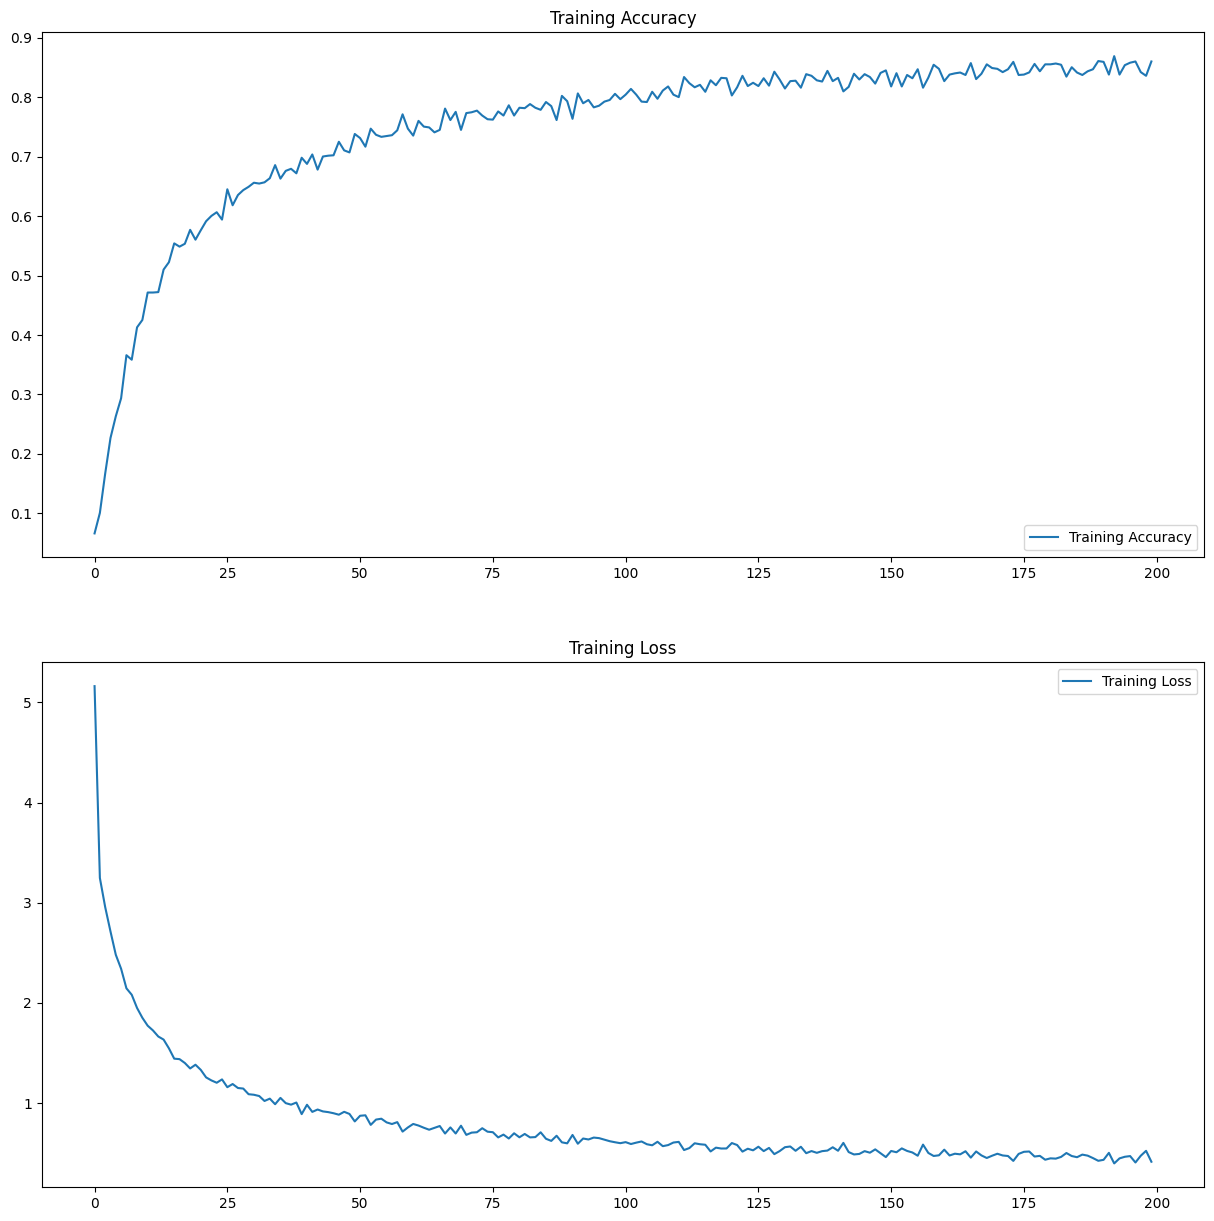

In [5]:
# Display the data

import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()


1/1 [==============================] - 0s 19ms/step


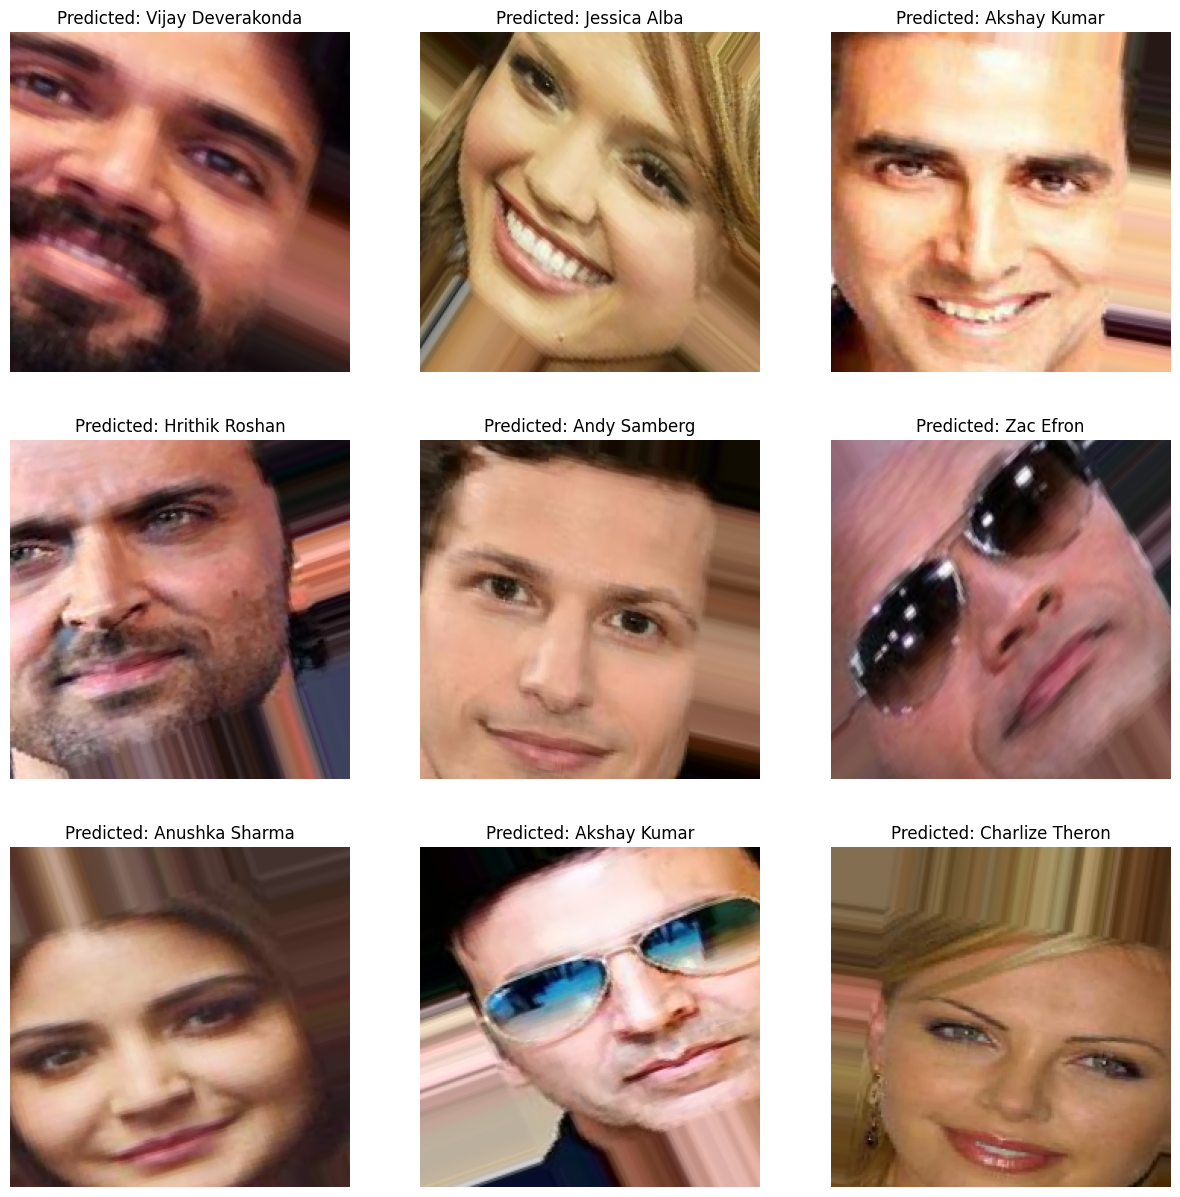

In [6]:
import matplotlib.pyplot as plt

# Get the class labels
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())

# Display the images and their predicted labels
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i in range(9):
    x, y = train_generator.next()
    image = x[0]
    label = y[0]
    # Get the predicted label
    pred = model.predict(np.expand_dims(image, axis=0))
    pred_label = np.argmax(pred)
    pred_label = class_labels[pred_label]
    ax[i//3, i%3].imshow(image)
    ax[i//3, i%3].set_title(f'Predicted: {pred_label}')
    ax[i//3, i%3].axis('off')
plt.show()